In [2]:
import pandas as pd
import numpy as np


In [68]:
data = pd.read_csv("./Data/2022_data.csv", encoding="ISO-8859-1", sep = ';')
TrainTimes = pd.read_csv('./Data/InterStationTrainTimes.csv', delimiter= ';', skiprows=1)

df_zones = pd.read_csv("./Data/zone1.csv", header = None)
df_zones.columns = ['station']
df_zones

,station
0,Aldgate
1,Aldgate East
2,Angel
3,Baker Street
4,Bank and Monument
...,...
61,Vauxhall LU
62,Victoria LU
63,Warren Street
64,Waterloo LU


In [4]:
tube_lines = pd.read_csv('./Data/TfL_stations.csv')

In [5]:
# tube_lines = tube_lines[tube_lines['NETWORK'] == 'London Underground']
# tube_lines

In [50]:
TrainTimes = TrainTimes.dropna(axis=0, how='all')
TrainTimes = TrainTimes.dropna(axis=1, how='all')
# for i in range(len(TrainTimes)):
#     print(type(TrainTimes['Station from (A)'][i]))

In [51]:
pd.set_option('display.max_columns', 1000)


In [52]:
data


,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late,0500-0515,0515-0530,0530-0545,0545-0600,0600-0615,0615-0630,0630-0645,0645-0700,0700-0715,0715-0730,0730-0745,0745-0800,0800-0815,0815-0830,0830-0845,0845-0900,0900-0915,0915-0930,0930-0945,0945-1000,1000-1015,1015-1030,1030-1045,1045-1100,1100-1115,1115-1130,1130-1145,1145-1200,1200-1215,1215-1230,1230-1245,1245-1300,1300-1315,1315-1330,1330-1345,1345-1400,1400-1415,1415-1430,1430-1445,1445-1500,1500-1515,1515-1530,1530-1545,1545-1600,1600-1615,1615-1630,1630-1645,1645-1700,1700-1715,1715-1730,1730-1745,1745-1800,1800-1815,1815-1830,1830-1845,1845-1900,1900-1915,1915-1930,1930-1945,1945-2000,2000-2015,2015-2030,2030-2045,2045-2100,2100-2115,2115-2130,2130-2145,2145-2200,2200-2215,2215-2230,2230-2245,2245-2300,2300-2315,2315-2330,2330-2345,2345-0000,0000-0015,0015-0030,0030-0045,0045-0100,0100-0115,0115-0130,0130-0145,0145-0200,0200-0215,0215-0230,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,11.650,305.000,2.264,3.781,3.172,1.490,637.000,3,8,17,25.0,39.0,50.0,69.0,94.0,121.0,135.000,164.000,181.000,204.000,209.000,224.000,229.000,222.0,205.0,193.0,177.0,159.0,150.0,139.0,138.0,139.0,138.0,142.0,143.0,149.0,149.0,157.0,159.0,164.0,161.0,166.0,163.0,165.0,160.0,164.0,165.0,168.000,159.000,187.000,198.00,204.000,220.000,252.000,259.000,273.000,300.000,305.000,303.000,284.000,278.000,252.000,241.000,220.000,199.000,172.000,152.000,127.000,110.000,100.000,90.000,85.000,80.000,79.0,77.00,77.000,75.000,76.000,74.00,70.000,66.000,63.0,52.0,37.0,26,15,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,15.466,369.000,2.826,5.177,4.272,1.991,831.000,4,12,23,34.0,50.0,63.0,79.0,105.0,137.0,163.000,186.000,228.000,248.000,268.000,272.000,291.000,274.0,268.0,248.0,242.0,224.0,213.0,199.0,194.0,192.0,189.0,192.0,193.0,198.0,200.0,209.0,213.0,219.0,219.0,223.0,221.0,222.0,221.0,225.0,227.0,229.000,232.000,252.000,271.00,282.000,302.000,347.000,361.000,371.000,404.000,414.000,392.000,375.000,367.000,345.000,315.000,288.000,263.000,231.000,191.000,173.000,152.000,136.000,124.000,116.000,108.000,105.0,104.00,101.000,98.000,96.000,99.00,93.000,84.000,75.0,70.0,47.0,33,24,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,39.472,763.000,7.737,12.532,11.089,5.064,2.287,6,9,24,44.0,77.0,136.0,194.0,274.0,367.0,450.000,544.000,637.000,718.000,776.000,811.000,766.000,763.0,695.0,632.0,578.0,579.0,522.0,512.0,502.0,505.0,491.0,502.0,502.0,510.0,509.0,514.0,507.0,513.0,505.0,508.0,507.0,512.0,512.0,526.0,534.0,543.000,542.000,566.000,607.00,665.000,741.000,825.000,888.000,939.000,1.017,1.015,1.031,1.067,1.041,953.000,906.000,809.000,680.000,580.000,489.000,415.000,368.000,323.000,298.000,286.000,274.000,271.0,272.00,277.000,286.000,284.000,278.00,265.000,232.000,195.0,174.0,124.0,84,58,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,43.646,805.000,7.633,13.773,12.683,5.842,2.909,7,11,28,51.0,87.0,136.0,208.0,276.0,364.0,467.000,545.000,638.000,721.000,754.000,764.000,749.000,721.0,677.0,639.0,594.0,585.0,546.0,521.0,520.0,521.0,516.0,526.0,531.0,541.0,550.0,555.0,555.0,566.0,561.0,565.0,572.0,575.0,578.0,593.0,598.0,611.000,656.000,690.000,742.00,805.000,853.000,912.000,1.036,1.097,1.138,1.225,1.236,1.173,1.136,1.090,982.000,875.000,767.000,660.000,559.000,481.000,429.000,390.000,355.000,344.000,327.000,326.0,330.00,347.000,355.000,362.000,364.00,341.000,301.000,257.0,222.0,152.0,105,68,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,49.960,936.000,8.379,15.432,14.195,6.913,4.104,10,15,

In [53]:
type(data['From Station'][0])

str

In [63]:
import re 

def append_distance(row):
    from_station = ''.join(filter(str.isalpha, row['From Station']))
    to_station = ''.join(filter(str.isalpha, row['To Station']))
    
    for index, train_row in TrainTimes.iterrows():
        pattern_from = re.compile(re.escape(from_station), re.IGNORECASE)
        pattern_to = re.compile(re.escape(to_station), re.IGNORECASE)
        
        train_from = ''.join(filter(str.isalpha, train_row['Station from (A)']))
        train_to = ''.join(filter(str.isalpha, train_row['Station to (B)']))
        
        if pattern_from.match(train_from) and pattern_to.match(train_to):
            return train_row['Distance (Kms)']
    return None

data['Distance (Kms)'] = data.apply(append_distance, axis=1)



In [81]:
# filtered_data = data[pd.notna(data['Distance (Kms)'])]

bounds = ['NB', 'SB']
# filtered_data = filtered_data[filtered_data['Dir'] not in bounds]
filtered_data

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late,0500-0515,0515-0530,0530-0545,0545-0600,0600-0615,0615-0630,0630-0645,0645-0700,0700-0715,0715-0730,0730-0745,0745-0800,0800-0815,0815-0830,0830-0845,0845-0900,0900-0915,0915-0930,0930-0945,0945-1000,1000-1015,1015-1030,1030-1045,1045-1100,1100-1115,1115-1130,1130-1145,1145-1200,1200-1215,1215-1230,1230-1245,1245-1300,1300-1315,1315-1330,1330-1345,1345-1400,1400-1415,1415-1430,1430-1445,1445-1500,1500-1515,1515-1530,1530-1545,1545-1600,1600-1615,1615-1630,1630-1645,1645-1700,1700-1715,1715-1730,1730-1745,1745-1800,1800-1815,1815-1830,1830-1845,1845-1900,1900-1915,1915-1930,1930-1945,1945-2000,2000-2015,2015-2030,2030-2045,2045-2100,2100-2115,2115-2130,2130-2145,2145-2200,2200-2215,2215-2230,2230-2245,2245-2300,2300-2315,2315-2330,2330-2345,2345-0000,0000-0015,0015-0030,0030-0045,0045-0100,0100-0115,0115-0130,0130-0145,0145-0200,0200-0215,0215-0230,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500,Distance (Kms)
5,PICu_BAK_NB>OXCu_BAK_NB@BAK,Bakerloo,NB,6,674,PICu,Piccadilly Circus,669,OXCu,Oxford Circus,60.099,866.000,7.267,16.541,16.438,10.203,8.784,0,17,35,58.0,99.0,157.000,215.000,285.000,375.000,443.000,530.000,588.000,674.000,704.000,730.000,705.000,698.000,644.000,601.000,576.000,560.000,546.000,524.000,537.000,543.000,547.000,545.000,562.000,576.000,583.000,591.000,621.000,645.000,655.000,681.000,725.000,752.000,775.000,805.000,841.000,919.000,945.000,986.000,1.078,1.140,1.144,1.221,1.393,1.420,1.466,1.550,1.580,1.458,1.427,1.378,1.260,1.137,1.045,937.000,855.000,789.000,751.000,733.000,726.000,727.000,759.000,825.000,918.000,1.038,1.101,1.117,1.102,1.051,865.000,769.000,623.000,477.0,292,216,90,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0,97"
6,OXCu_BAK_NB>RPKu_BAK_NB@BAK,Bakerloo,NB,7,669,OXCu,Oxford Circus,685,RPKu,Regent's Park,66.098,1.231,9.324,18.545,17.400,10.862,8.737,0,17,39,79.0,132.0,236.000,324.000,404.000,549.000,640.000,691.000,769.000,903.000,902.000,923.000,929.000,868.000,781.000,705.000,662.000,624.000,624.000,591.000,612.000,620.000,621.000,623.000,640.000,653.000,663.000,674.000,712.000,739.000,756.000,785.000,828.000,848.000,873.000,899.000,932.000,976.000,1.000,1.105,1.146,1.221,1.253,1.382,1.412,1.490,1.571,1.608,1.571,1.540,1.540,1.441,1.371,1.275,1.157,1.014,931.000,858.000,804.000,786.000,773.000,758.000,780.000,829.000,895.000,983.000,1.033,1.070,1.069,996.000,895.000,799.000,651.000,504.0,358,224,108,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0,87"
7,RPKu_BAK_NB>BSTu_BAK_NB@BAK,Bakerloo,NB,8,685,RPKu,Regent's Park,511,BSTu,Baker Street,64.318,1.120,8.516,17.652,17.354,10.768,8.908,0,17,27,52.0,129.0,207.000,288.000,399.000,517.000,580.000,640.000,737.000,789.000,850.000,837.000,845.000,783.000,726.000,613.000,601.000,569.000,547.000,542.000,565.000,576.000,580.000,581.000,596.000,617.000,620.000,639.000,675.000,698.000,719.000,754.000,781.000,811.000,843.000,865.000,899.000,948.000,1.025,1.069,1.132,1.214,1.303,1.323,1.398,1.478,1.556,1.538,1.571,1.611,1.544,1.440,1.379,1.274,1.113,1.015,922.000,865.000,808.000,779.000,773.000,768.000,769.000,813.000,870.000,953.000,1.018,1.053,1.052,1.047,945.000,804.000,702.000,556.0,358,224,147,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0,88"
40,BSTu_BAK_SB>RPKu_BAK_SB@BAK,Bakerloo,SB,17,511,BSTu,Baker Street,685,RPKu,Regent's Park,60.560,1.362,10.992,21.090,15.916,8.170,3.029,0,11,41,76.0,153.0,240.000,361.000,480.000,588.000,663.000,779.000,865.000,980.000,1.042,1.101,1.096,1.070,979.000,943.000,887.000,870.000,855.000,850.000,848.000,873.000,874.000,890.000,905.000,922.000,923.000,907.000,879.000,866.000,840.000,817.000,824.000,833.000,826.000,838.000,860.000,877.000,900.000,988.000,1.026,1.122,1.174,1.226,1.249,1.376,1.367,1.393,1.429,1.486,1.410,1.378,1.306,1.198,1.026,909.000,813.000,732.000,654.000,590.000,532.000,479.000,440.000,412.000,386.000,381.000,368.000,373.000,374.000,348.000,317.000,283.000,22

In [73]:
filtered_data = filtered_data[filtered_data['From Station'].isin(df_zones['station'])]
len(filtered_data['From Station'].unique())

41

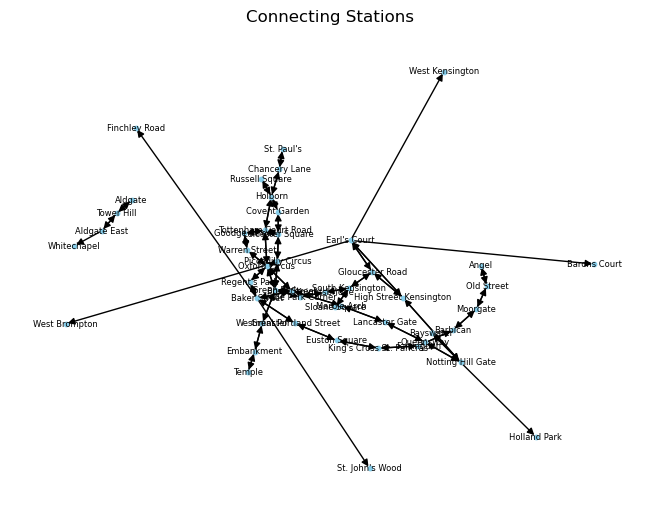

In [78]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def plot_connecting_stations(df):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges from the DataFrame
    for _, row in df.iterrows():
        G.add_edge(row['From Station'], row['To Station'])
    
    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', font_size=6)
    plt.title('Connecting Stations')
    plt.show()

# Example DataFrame


# Plot connecting stations
plot_connecting_stations(filtered_data)
